In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
# import the function
from src.data.import_data import *
from src.data.make_dataset import *

import matplotlib.pyplot as plt

from rdtools.soiling import cods_analysis

# CODS degradation rate analysis

In [27]:
def test_cods_with_weather(path_to_pkl_dir, path_to_info, nr_files, offset=0, degradation_method='YoY'):
    
    df_info = import_df_info_from_zip(path_to_info)
    residuals = np.array([])
    for i in range(nr_files):
        file_name = path_to_pkl_dir.split("/")[-2]
        df = pd.read_pickle(path_to_pkl_dir + file_name + f"_{str(i+1).zfill(3)}.pkl", compression = 'gzip')
        df = df.iloc[offset:]
        cods = cods_analysis(df.PI)
        _, deg, *_ = cods.iterative_signal_decomposition(perfect_cleaning=True, order=['SC', 'SR', 'Rd'], 
                                                         degradation_method=degradation_method)
        deg = deg / 100
        residuals = np.append(residuals, (deg - df_info.Degradation_rate_linear.iloc[i]))
        #print(f"The residual of {i+1}th dataset is {deg - df_info.Degradation_rate_linear.iloc[i]}")
    return residuals, np.sqrt(np.sum(residuals**2)/len(residuals))
    

# YoY for degradation rate

## Basic dataset

In [4]:
%%time
residuals, rmse = test_cods_with_weather("../data/processed/synthetic_basic_pi_daily/", "../data/raw/synthetic_basic.zip", 50)

CPU times: user 6min 33s, sys: 1min 46s, total: 8min 19s
Wall time: 5min 49s


Text(0.5, 0, 'Sample')

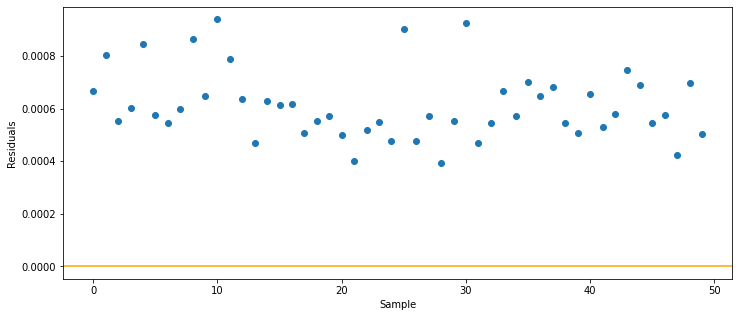

In [5]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals, 'o')
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")

In [6]:
print(f"The RMSE between true and predicted degradation rates for basic dataset is {rmse:.4f}")

The RMSE between true and predicted degradation rates for basic dataset is 0.0006


## Soil dataset

In [7]:
%%time
residuals_s, rmse_s = test_cods_with_weather("../data/processed/synthetic_soil_pi_daily/", "../data/raw/synthetic_soil.zip", 50)

CPU times: user 5min 40s, sys: 1min 34s, total: 7min 14s
Wall time: 5min 1s


Text(0.5, 0, 'Sample')

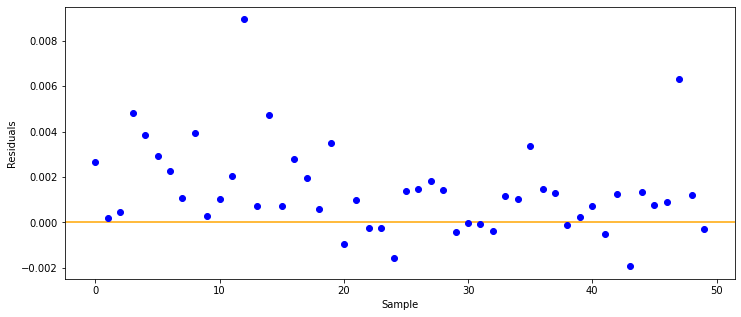

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_s, 'o', color="blue")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")

In [9]:
print(f"The RMSE between true and predicted degradation rates for soil dataset is {rmse_s:.4f}")

The RMSE between true and predicted degradation rates for soil dataset is 0.0024


## Weather dataset

In [10]:
%%time
residuals_w, rmse_w = test_cods_with_weather("../data/processed/synthetic_weather_pi_daily/", "../data/raw/synthetic_weather.zip", 50)

CPU times: user 5min 13s, sys: 1min 28s, total: 6min 41s
Wall time: 4min 36s


Text(0.5, 0, 'Sample')

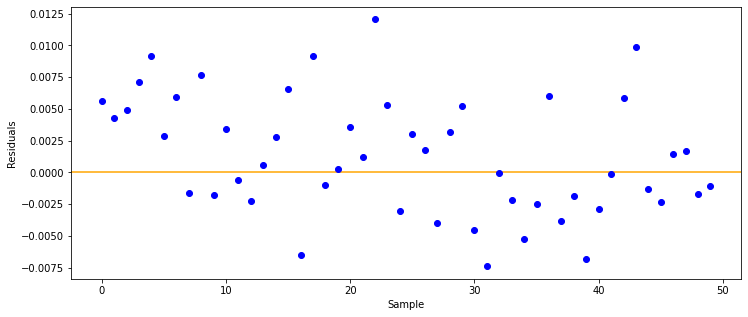

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_w, 'o', color="blue")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")

In [12]:
print(f"The RMSE between true and predicted degradation rates for weather dataset is {rmse_w:.4f}")

The RMSE between true and predicted degradation rates for weather dataset is 0.0048


## Weather and soil dataset

In [13]:
%%time
residuals_ws, rmse_ws = test_cods_with_weather("../data/processed/synthetic_soil_weather_pi_daily/", "../data/raw/synthetic_soil_weather.zip", 50)

CPU times: user 5min 13s, sys: 1min 30s, total: 6min 44s
Wall time: 4min 36s


Text(0.5, 0, 'Sample')

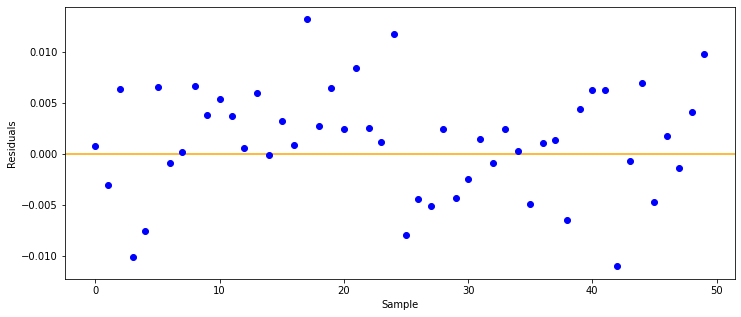

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_ws, 'o', color="blue")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")

In [15]:
print(f"The RMSE between true and predicted degradation rates for weather+soil dataset is {rmse_ws:.4f}")

The RMSE between true and predicted degradation rates for weather+soil dataset is 0.0054


# STL for degradation rate

## Basic dataset using STL instead of YoY

In [37]:
%%time
residuals_b_s, rmse_b_s = test_cods_with_weather("../data/processed/synthetic_basic_pi_daily/", "../data/raw/synthetic_basic.zip", 50, degradation_method='STL')



CPU times: user 5min 47s, sys: 1min 35s, total: 7min 23s
Wall time: 5min 8s


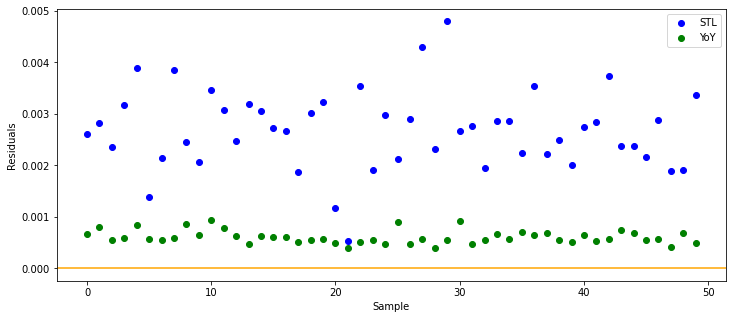

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_b_s, 'o', color="blue", label="STL")
ax.plot(residuals, 'o', color="green", label="YoY")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")
ax.legend()

In [39]:
print(f"The RMSE between true and predicted degradation rates for basic dataset with STL is {rmse_b_s:.4f}")

The RMSE between true and predicted degradation rates for basic dataset with STL is 0.0041


## Soil dataset using STL instead of YoY

In [31]:
%%time
residuals_s_s, rmse_s_s = test_cods_with_weather("../data/processed/synthetic_soil_pi_daily/", "../data/raw/synthetic_soil.zip", 50, degradation_method='STL')

CPU times: user 5min 4s, sys: 1min 23s, total: 6min 27s
Wall time: 4min 28s


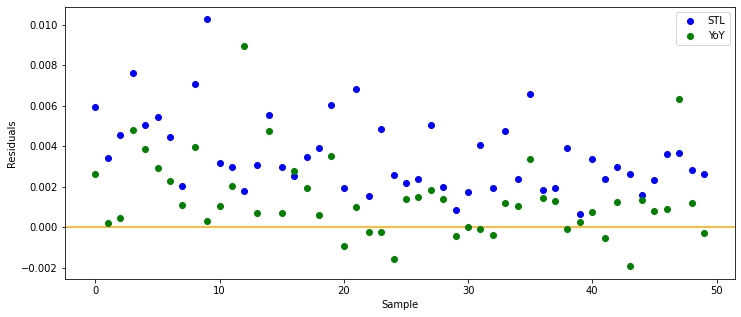

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_s_s, 'o', color="blue", label="STL")
ax.plot(residuals_s, 'o', color="green", label="YoY")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")
ax.legend()

In [33]:
print(f"The RMSE between true and predicted degradation rates for soil dataset with STL is {rmse_s_s:.4f}")

The RMSE between true and predicted degradation rates for soil dataset with STL is 0.0041


## Weather dataset using STL instead of YoY

In [42]:
%%time
residuals_w_s, rmse_w_s = test_cods_with_weather("../data/processed/synthetic_weather_pi_daily/", "../data/raw/synthetic_weather.zip", 50, degradation_method='STL')


CPU times: user 5min 9s, sys: 1min 23s, total: 6min 32s
Wall time: 4min 34s


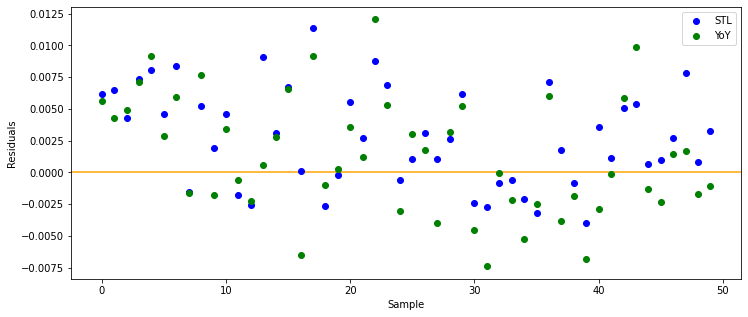

In [44]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_w_s, 'o', color="blue", label="STL")
ax.plot(residuals_w, 'o', color="green", label="YoY")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")
ax.legend()

In [43]:
print(f"The RMSE between true and predicted degradation rates for weather dataset with STL is {rmse_w_s:.4f}")

The RMSE between true and predicted degradation rates for weather dataset with STL is 0.0047


## Weather and soil dataset using STL instead of YoY

In [28]:
%%time
residuals_ws_s, rmse_ws_s = test_cods_with_weather("../data/processed/synthetic_soil_weather_pi_daily/", "../data/raw/synthetic_soil_weather.zip", 50, degradation_method='STL')

CPU times: user 5min 14s, sys: 1min 30s, total: 6min 44s
Wall time: 4min 37s


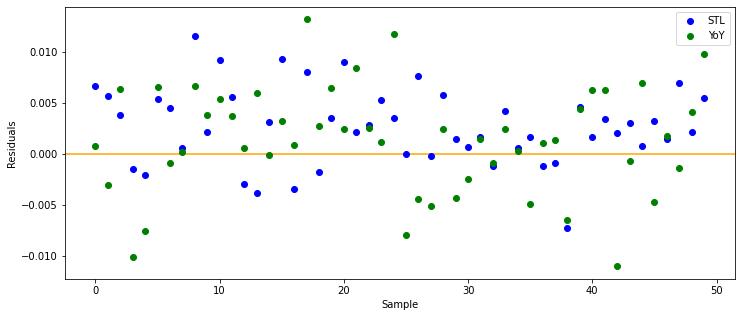

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axhline(color='orange')
ax.plot(residuals_ws_s, 'o', color="blue", label="STL")
ax.plot(residuals_ws, 'o', color="green", label="YoY")
ax.set_ylabel('Residuals')
ax.set_xlabel("Sample")
ax.legend()

In [29]:
print(f"The RMSE between true and predicted degradation rates for weather+soil dataset with STL is {rmse_ws_s:.4f}")

The RMSE between true and predicted degradation rates for weather+soil dataset with STL is 0.0046
